In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Reading

Data is in json format; so it's better to convert it to a Pandas data frame format.

In [2]:
import json

with open(r'C:\Users\BELHASSEN\Desktop\dataa1\intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,how-are-you,"[How are you?, How's it going?, How do you do?]","[Great to chat with you!, I'm doing well, than..."
4,evening,[Good evening],[Good evening. How has your day been?]
...,...,...,...
81,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
82,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
83,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
84,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


Each tag contains several questions(patterns) and several answers(responses); Now I want to seperate these patterns based on their tags and responses and finally convert them to a DataFrame.

In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
300,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
301,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
302,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
303,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [4]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'how-are-you', 'evening',
       'night', 'goodbye', 'thanks', 'no-response', 'neutral-response',
       'about', 'user_age', 'skill', 'creation', 'name', 'help', 'sad',
       'stressed', 'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'lung_cancer',
       'lung_cancer_info', 'death', 'understand', 'done', 'suicide',
       'hate-you', 'hate-me', 'default', 'jokes', 'repeat', 'wrong',
       'stupid', 'location', 'something-else', 'friends', 'ask',
       'problem', 'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'learn-mental-health',
       'mental-health-fact', 'fact-1', 'fact-2', 'fact-anxiety',
       'fact-depression', 'fact-stress', 'fact-5',
       'fact-anxiety-symptoms', 'fact-stress-management', 'fact-6',
       'fact-7', 'fact-8', 'fact-9', 'fact-10', 'fact-11', 'fact-12',
       'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-

# Data Preprocessing

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 305,
 'word_counts': '{"hi": 2, "hey": 2, "is": 21, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "how": 20, "are": 25, "you": 46, "how\'s": 1, "it": 8, "going": 4, "do": 23, "evening": 1, "night": 1, "bye": 3, "see": 2, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 13, "the": 17, "help": 11, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 7, "what": 48, "tell": 12, "me": 29, "more": 7, "about": 28, "yourself": 3, "your": 3, "name": 3, "should": 6, "i": 115, "call": 1, "what\'s": 4, "am": 20, "years": 1, "old": 1, "my": 15, "age": 2, "can": 27, "created": 2, "were": 2, "made"

In [6]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  360


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (305, 18)
y shape =  (305,)
num of classes =  86


In [8]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install graphviz



# Build and Train Model

In [10]:
import tensorflow
import graphviz

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model


model = Sequential()
model.add(Input(shape=(X.shape[1],)))

model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 18, 100)             │          36,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 18, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 18, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 86)                  │          11,094 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,298 (399.60 KB)

 Trainable params: 102,298 (399.60 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [11]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=20,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=25)

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0259 - loss: 5.1616
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1078 - loss: 3.9824
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2252 - loss: 3.2872
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3445 - loss: 2.8757
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4396 - loss: 2.3702
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5228 - loss: 2.0688
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6176 - loss: 1.8697
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6760 - loss: 1.5336
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7394 - loss: 1.3049
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8107 - loss: 1.0971
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8165 - loss: 0.9405
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy:

dict_keys(['accuracy', 'loss'])


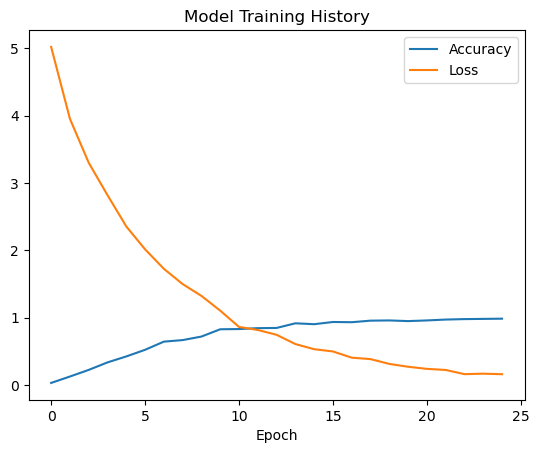

In [12]:
# Accessing training history
print(model_history.history.keys())

# Plotting training history
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()


# Model Testing

First we should apply some text preprocessing on the pattern that is passed to the function. Next we convert the text to vector of numbers and give it to model for prediction its tag; Finally based on the tag, we choose a answer(response) randomly and return it.

In [13]:
import re
import random

def generate_answer(pattern): 
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)
        
    x_test = tokenizer.texts_to_sequences(text)
    x_test = pad_sequences(x_test, padding='post', maxlen=X.shape[1])  # Remove unnecessary list wrapping
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]
    print("you: {}".format(pattern))
    print("ChatPal: {}".format(random.choice(responses)))


In [19]:
generate_answer('hello')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
you: hello
ChatPal: Hi there. What brings you here today?


In [18]:
generate_answer(' i am depressed i find out that i am adopted and my biological family died  with cancer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
you:  i am depressed i find out that i am adopted and my biological family died  with cancer
ChatPal: My condolences. I'm here if you need to talk.


In [22]:
generate_answer('i dont want to die with cancer i want to suicide')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
you: i dont want to die with cancer i want to suicide
ChatPal: Next, I would suggest you to practice meditation. Meditation can produce a deep state of relaxation and a tranquil mind.


In [23]:
generate_answer('what is depression')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
you: what is depression
ChatPal: Depression is a mental health disorder characterized by persistently depressed mood or loss of interest in activities, causing significant impairment in daily life.


In [24]:
generate_answer('i have one')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
you: i have one
ChatPal: That seem awful. What do you think is behind this?


In [25]:
generate_answer('pids code')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
you: pids code
ChatPal: Sorry, I didn't understand you.


In [27]:
generate_answer('tell me more about the lung cancer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
you: tell me more about the lung cancer
ChatPal: Lung cancer is a type of cancer that originates in the lungs. It occurs when abnormal cells in the lung tissue begin to grow uncontrollably, forming tumors. These tumors can interfere with the normal function of the lungs, leading to symptoms and complications. There are two main types of lung cancer: non-small cell lung cancer and small cell lung cancer. Non-small cell lung cancer is more common and tends to grow and spread more slowly than small cell lung cancer.The primary cause of lung cancer is cigarette smoking, with smokers being at the highest risk. However, non-smokers can also develop lung cancer due to factors such as exposure to secondhand smoke, environmental pollutants like radon and asbestos, genetic predisposition, and occupational exposures.Symptoms of lung cancer may vary depending on the type, stage, and location of the cancer, but common signs include a persistent cough, chest pai

In [29]:
generate_answer('you are not helping me, you are useless')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
you: you are not helping me, you are useless
ChatPal: I wish you wouldn't say such hurtful things. I'm sorry if I wasn't useful


In [32]:
generate_answer('who made you?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
you: who made you?
ChatPal: I was trained on a text dataset using Deep Learning & Natural Language Processing techniques by Diagnox


In [38]:
generate_answer('what is your name')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
you: what is your name
ChatPal: I'm ChatPal. I am a conversational agent designed to mimic a therapist. So how are you feeling today?


In [42]:
generate_answer('i am not feeling good today')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
you: i am not feeling good today
ChatPal: Don't let the little worries bring you down. What's the worse that can happen?


In [43]:
generate_answer('maybe i can die soon because i am sick')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
you: maybe i can die soon because i am sick
ChatPal: Although ChatPal cannot substitute for professional advice, we encourage those with symptoms to talk to their friends and family members and seek the counsel of a mental health professional. The sooner the mental health condition is identified and treated, the sooner they can get on the path to recovery. If you know someone who is having problems, don't assume that the issue will resolve itself. Let them know that you care about them, and that there are treatment options available that will help them heal. Speak with a mental health professional or counselor if you think your friend or family member is experiencing the symptoms of a mental health condition. If the affected loved one knows that you support them, they will be more likely to seek out help.


In [48]:
generate_answer('i want to go to doctor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
you: i want to go to doctor
ChatPal: I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: +21650925051.


In [49]:
generate_answer('thank you for help')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
you: thank you for help
ChatPal: Happy to help!


In [50]:
generate_answer('good night bro!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
you: good night bro!
ChatPal: Good night. Sweet dreams.


In [52]:
generate_answer('what is mental illness')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
you: what is mental illness
ChatPal: Mental illnesses are health conditions that disrupt a person's thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life. Mental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital. It is important to know that mental illnesses are medical conditions that have nothing to do with a person's character, intelligence, or willpower. Just as diabetes is a disorder of the pancreas, mental illness is a medical condition due to the brain's biology